The second assignment covered the topic of machine learning projects. A dataset on house prices in Washington state was used for every step of a project. In order to familiarize myself with the concepts and theoretical aspect, I will do the same with a dataset depicting the prices of diamonds. 
Here we are importing the dataset as well as helping packages for the analysis. By using data.head or data.info we can gain an insight into the different variables.

In [14]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/SEDataScience/diamond_price_prediction.csv")

data.head(10)
# data.info

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Variables: 
carat: numeric
cut: ordinal
color: categorical
clarity: categorical
depth: numeric
table: numeric
price: numeric
x: numeric
y: numeric
z: numeric

For a better understanding and visual aids, a histogram was created. Bins are set to 25 for the width of the variables and figsize is the size of the figure in width and height.

Additionally, a scatter plot was created to show the correlation between the price and carat or cut variable.

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

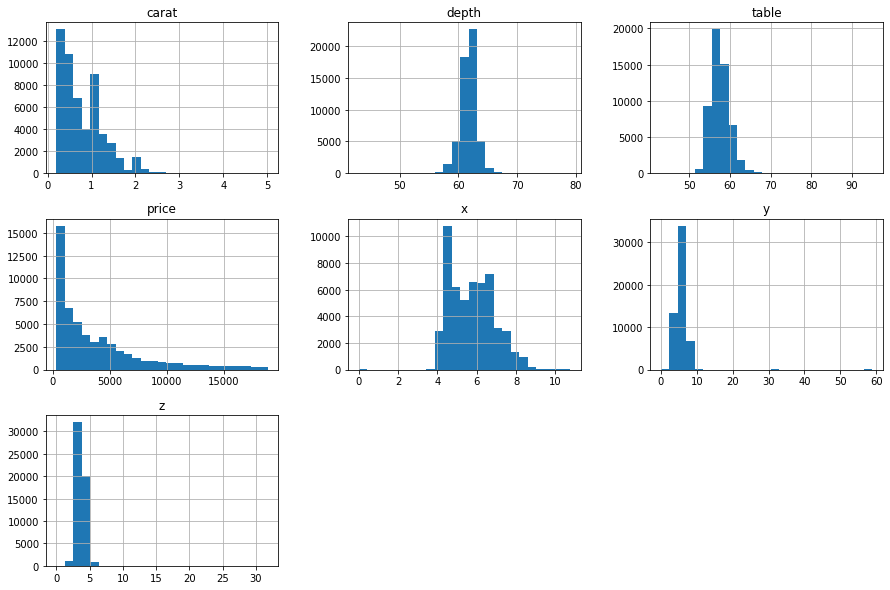

In [4]:
data.hist(bins = 25, figsize = (15, 10))

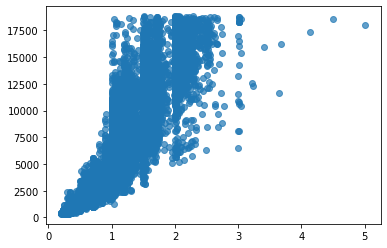

In [22]:
import numpy as np

plt.scatter(data['carat'], data['price'], alpha = 0.7)
#plt.scatter(data['cut'], data['price'], alpha = 0.7)
plt.set_cmap('PuBuGn_r')
plt.show()

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='carat', ylabel='price'>,
        <Axes: xlabel='depth', ylabel='price'>,
        <Axes: xlabel='table', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='carat'>,
        <Axes: xlabel='carat', ylabel='carat'>,
        <Axes: xlabel='depth', ylabel='carat'>,
        <Axes: xlabel='table', ylabel='carat'>],
       [<Axes: xlabel='price', ylabel='depth'>,
        <Axes: xlabel='carat', ylabel='depth'>,
        <Axes: xlabel='depth', ylabel='depth'>,
        <Axes: xlabel='table', ylabel='depth'>],
       [<Axes: xlabel='price', ylabel='table'>,
        <Axes: xlabel='carat', ylabel='table'>,
        <Axes: xlabel='depth', ylabel='table'>,
        <Axes: xlabel='table', ylabel='table'>]], dtype=object)

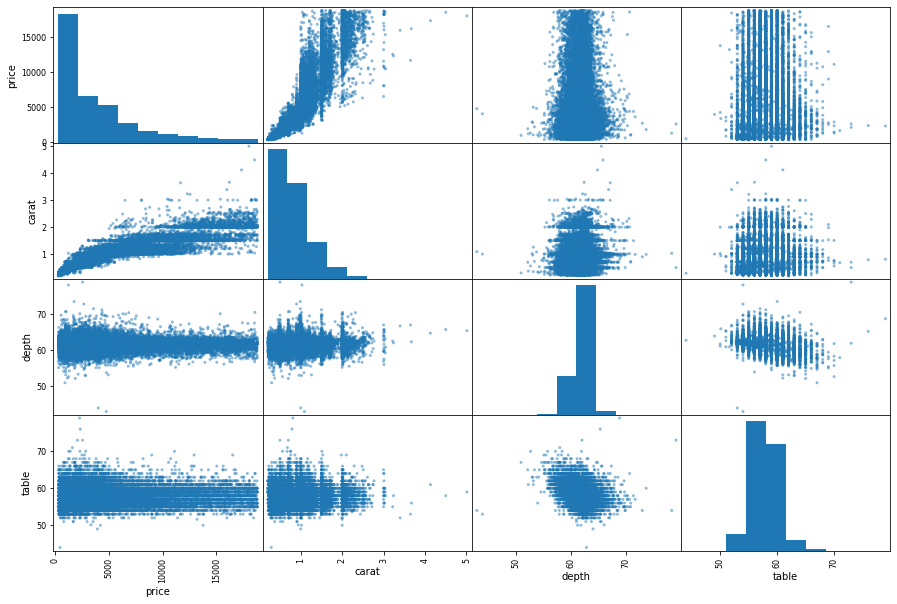

In [24]:
pd.plotting.scatter_matrix(data[['price', 'carat', 'cut', 'color', 'depth', 'clarity', 'table']], figsize = [15, 10])

The next step in our machine learning project is to prepare test and training data, similar to the last exercise. Here, a distinction of different price categories are made according to percentiles in the subset "price" and are added to the dataset in a new column.

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np

data['extra_column'] = pd.cut(data['price'], bins = [data['price'].min(), np.percentile(data['price'], 25), np.percentile(data['price'], 50), np.percentile(data['price'], 75), data['price'].max()], labels = ['affordable', 'adequate', 'expensive', 'very expensive'])
train_set, test_set = train_test_split(data, test_size = 0.33, random_state = 42)


In [16]:
data = train_set.copy()
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,extra_column
241,1.01,Fair,E,I1,64.5,58.0,2788,6.29,6.21,4.03,expensive
17398,0.32,Ideal,G,SI1,61.4,57.0,612,4.41,4.38,2.70,affordable
36608,0.34,Very Good,E,SI2,62.5,59.0,477,4.43,4.46,2.78,affordable
44731,0.56,Ideal,H,VS1,61.8,55.0,1616,5.30,5.34,3.29,adequate
18104,1.02,Ideal,G,VS1,61.0,57.0,7324,6.48,6.50,3.96,very expensive
27324,2.43,Ideal,I,SI2,62.3,59.0,17856,8.54,8.61,5.34,very expensive
44051,0.52,Ideal,E,VS2,62.3,53.0,1549,5.17,5.20,3.23,adequate
53368,0.53,Ideal,F,IF,61.3,57.0,2658,5.19,5.21,3.19,expensive
47478,0.60,Ideal,G,VS2,60.4,57.0,1861,5.49,5.51,3.32,adequate
13810,1.06,Very Good,H,VS1,61.9,58.0,5627,6.57,6.49,4.04,very expensive


In [23]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.033351,0.175629,0.921798,0.975212,0.948318,0.945965
depth,0.033351,1.000000,-0.297566,-0.004589,-0.020945,-0.026081,0.098007
table,0.175629,-0.297566,1.000000,0.120597,0.190703,0.178906,0.144665
price,0.921798,-0.004589,0.120597,1.000000,0.885163,0.862661,0.855342
x,0.975212,-0.020945,0.190703,0.885163,1.000000,0.970684,0.962937
y,0.948318,-0.026081,0.178906,0.862661,0.970684,1.000000,0.940992
z,0.945965,0.098007,0.144665,0.855342,0.962937,0.940992,1.000000


Experimenting with densities.

In [25]:
data['carat_density'] = data['carat'] / data['depth']
data.corr()

,carat,depth,table,price,x,y,z,carat_density
carat,1.000000,0.033351,0.175629,0.921798,0.975212,0.948318,0.945965,0.998681
depth,0.033351,1.000000,-0.297566,-0.004589,-0.020945,-0.026081,0.098007,-0.011625
table,0.175629,-0.297566,1.000000,0.120597,0.190703,0.178906,0.144665,0.188387
price,0.921798,-0.004589,0.120597,1.000000,0.885163,0.862661,0.855342,0.922830
x,0.975212,-0.020945,0.190703,0.885163,1.000000,0.970684,0.962937,0.976944
y,0.948318,-0.026081,0.178906,0.862661,0.970684,1.000000,0.940992,0.950398
z,0.945965,0.098007,0.144665,0.855342,0.962937,0.940992,1.000000,0.941840
carat_density,0.998681,-0.011625,0.188387,0.922830,0.976944,0.950398,0.941840,1.000000


In [26]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()

In [27]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = "median")

# dropna() = analyze and show rows and columns with null values
missing_data = data.dropna(axis = 1, how = 'any')
print(missing_data)

       carat        cut color clarity  depth  table     x     y     z
241     1.01       Fair     E      I1   64.5   58.0  6.29  6.21  4.03
17398   0.32      Ideal     G     SI1   61.4   57.0  4.41  4.38  2.70
36608   0.34  Very Good     E     SI2   62.5   59.0  4.43  4.46  2.78
44731   0.56      Ideal     H     VS1   61.8   55.0  5.30  5.34  3.29
18104   1.02      Ideal     G     VS1   61.0   57.0  6.48  6.50  3.96
...      ...        ...   ...     ...    ...    ...   ...   ...   ...
11284   1.05  Very Good     I     VS2   62.4   59.0  6.48  6.51  4.05
44732   0.47      Ideal     D     VS1   61.0   55.0  5.03  5.01  3.06
38158   0.33  Very Good     F      IF   60.3   58.0  4.49  4.46  2.70
860     0.90    Premium     J     SI1   62.8   59.0  6.13  6.03  3.82
15795   1.14    Premium     F     SI1   60.4   58.0  6.82  6.79  4.11

[36139 rows x 9 columns]


For better comparisons, we will convert the ordinal "cut" variable so that it is numeric. The phases "Ideal", "Premium", "Very Good", "Good", and "Fair", will be set to 5, 4, 3, 2, 1 with 5 being the best score.

In [32]:
from sklearn.preprocessing import OneHotEncoder

data['cut'].replace({"Ideal": 5, "Premium": 4, "Very Good": 3, "Good": 4, "Fair": 1}, inplace=True)
print(data)

       carat  cut color clarity  depth  table     x     y     z  \
241     1.01    1     E      I1   64.5   58.0  6.29  6.21  4.03   
17398   0.32    5     G     SI1   61.4   57.0  4.41  4.38  2.70   
36608   0.34    3     E     SI2   62.5   59.0  4.43  4.46  2.78   
44731   0.56    5     H     VS1   61.8   55.0  5.30  5.34  3.29   
18104   1.02    5     G     VS1   61.0   57.0  6.48  6.50  3.96   
...      ...  ...   ...     ...    ...    ...   ...   ...   ...   
11284   1.05    3     I     VS2   62.4   59.0  6.48  6.51  4.05   
44732   0.47    5     D     VS1   61.0   55.0  5.03  5.01  3.06   
38158   0.33    3     F      IF   60.3   58.0  4.49  4.46  2.70   
860     0.90    4     J     SI1   62.8   59.0  6.13  6.03  3.82   
15795   1.14    4     F     SI1   60.4   58.0  6.82  6.79  4.11   

         extra_column  
241         expensive  
17398      affordable  
36608      affordable  
44731        adequate  
18104  very expensive  
...               ...  
11284       expensive  
447

By having turned cut into a numerical variable, we are now able to analyze its effect on other variables.

In [30]:
data.corr()

,carat,cut,depth,table,x,y,z
carat,1.000000,-0.139938,0.033351,0.175629,0.975212,0.948318,0.945965
cut,-0.139938,1.000000,-0.169529,-0.409105,-0.131307,-0.125194,-0.148888
depth,0.033351,-0.169529,1.000000,-0.297566,-0.020945,-0.026081,0.098007
table,0.175629,-0.409105,-0.297566,1.000000,0.190703,0.178906,0.144665
x,0.975212,-0.131307,-0.020945,0.190703,1.000000,0.970684,0.962937
y,0.948318,-0.125194,-0.026081,0.178906,0.970684,1.000000,0.940992
z,0.945965,-0.148888,0.098007,0.144665,0.962937,0.940992,1.000000


The following variables were transformed.

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

default_num_pipeline = make_pipeline(StandardScaler())

log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["carat", "depth"]),
 ("cat", cat_pipeline, ["color", "clarity"]),
 ("normal", default_num_pipeline, ["table", "cut"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

According to the homework assignment, the latter of the two represent the number of available features for prediction.

In [35]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

(36139, 19)

Here were are adding a linear regression model to work with our dataset.

In [36]:
from sklearn.linear_model import LinearRegression

data_label_transformed = preprocessing_label.fit_transform(data_label)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

data_predictions = lin_reg.predict(data)

The following exercises are performed to analyze the dataset and test how well the model works.

In [37]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
median_true = np.median(np.exp(data_label_transformed))
median_pred = np.median(np.exp(data_predictions))

medae = median_absolute_error(np.exp(data_label_transformed), np.exp(data_predictions))
rmse = mean_squared_error(np.exp(data_label_transformed), np.exp(data_predictions), squared = False)

print('True Median = ', median_true)
print('Predicted Median = ', median_pred)
print('Median Absolute Error = ', medae)
print('Root Mean Squared Error = ', rmse)

True Median =  2400.999999999999
Predicted Median =  2475.229556334177
Median Absolute Error =  174.65794816008474
Root Mean Squared Error =  804.9061057901175


Here we computed a Radom Forrest model that automatically determines a cross validation with n = 10 on the training dataset, similar to the assignment just with a different dataset.

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)


The following code line describes the dataset using the previously computed model.

In [39]:
pd.Series(forest_rmses).describe()

count     10.000000
mean    -574.030146
std       16.952113
min     -599.940232
25%     -587.383408
50%     -568.859986
75%     -564.267650
max     -546.219916
dtype: float64

In this final code segment, we are evaluating the test data and analyzing it according to key figures such as the mean, predicted median, MAE, and the RMSE

In [43]:
test_data_x = test_set.drop("price", axis=1)
test_data_y = test_set[["price"]].copy()

test_data_label = preprocessing_label.fit_transform(data_label)
# prediction = lin_reg.predict(test_data_y)

# final_model_eval = lin_reg.predict(test_data_x)


median_true = np.median(np.exp(data_label_transformed))
median_pred = np.median(np.exp(data_predictions))

medae = median_absolute_error(np.exp(data_label_transformed), np.exp(data_predictions))
rmse = mean_squared_error(np.exp(data_label_transformed), np.exp(data_predictions), squared = False)

print('Tested True Median = ', median_true)
print('Tested Predicted Median = ', median_pred)
print('Tested Median Absolute Error = ', medae)
print('Tested Root Mean Squared Error = ', rmse)

Tested True Median =  2400.999999999999
Tested Predicted Median =  2475.229556334177
Tested Median Absolute Error =  174.65794816008474
Tested Root Mean Squared Error =  804.9061057901175


And finally, to save and be able to reload our model, we use joblib

In [44]:
import joblib
joblib.dump(forest_reg, 'Prices of Diamonds')

['Prices of Diamonds']